In [1]:
from sklearn import datasets 
import numpy as np 
iris = datasets.load_iris() 
X = iris.data[:, [2, 3]] 
y = iris.target

In [2]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
sc.fit(X_train) 
X_train_std = sc.transform(X_train)


/usr/local/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


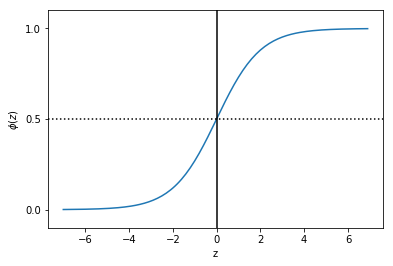

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z)) 
z = np.arange(-7, 7, 0.1) 

phi_z = sigmoid(z) 
plt.plot(z, phi_z) 
plt.axvline(0.0, color='k') 
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted') 
plt.axhline(y=0.5, ls='dotted', color='k') 
plt.yticks([0.0, 0.5, 1.0]) 
plt.ylim(-0.1, 1.1) 
plt.xlabel('z') 
plt.ylabel('$\phi (z)$') 
plt.show()

In [21]:
from matplotlib.colors import ListedColormap
def versiontuple(v):
    return tuple(map(int, (v.split("."))))
def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


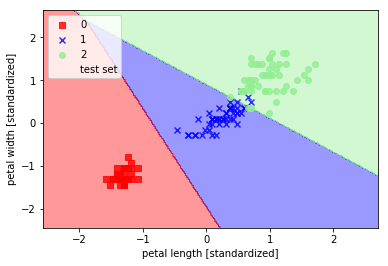

In [22]:
from sklearn.linear_model import LogisticRegression

#Entrene el modelo con el set de entrenamiento
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
#utilice la función plot_decision_region para plotear los resultados
plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left') 
plt.show()
#Mostrar resultado de predicciones

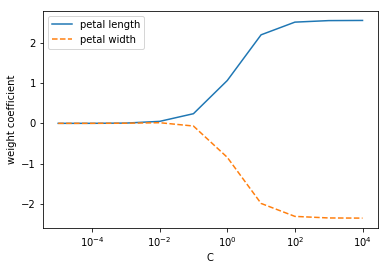

In [38]:
weights, params = [], [10**c for c in np.arange(-5,5, dtype=float)]
for c in params: 
    #Entrenar modelo y almacenar los pesos por parámetro


weights = np.array(weights)

#plotear ambos length y width de los pesos
plt.ylabel('weight coefficient') 
plt.xlabel('C') 
plt.legend(loc='upper left') 
plt.xscale('log') 
plt.show()
    